# <center>Linear Regression

### Import libraries

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Simple Linear Regression

We will start with the most familiar linear regression,fit a straight-line to data.

$
y = ax + b
$
where $a$ is commonly known as the *slope*, and $b$ is commonly known as the *intercept*.

Consider the following data, which is scattered about a line with a slope of 2 and an intercept of -5:

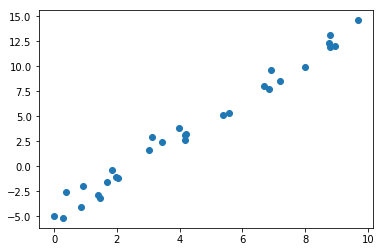

In [2]:
n = np.random.RandomState(1)
x = 10 * n.rand(30)
y = 2 * x - 5 + n.randn(30)
plt.scatter(x, y);

We can use Scikit-Learn's ``LinearRegression`` estimator to fit a straight line to data and create the best-fit line:

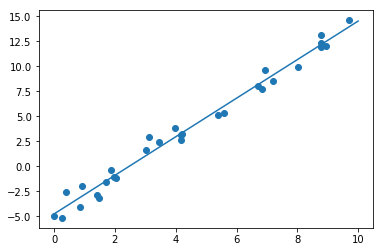

In [3]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=True)

model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit);

The slope and intercept of the data are contained in the model's fit parameters, which in Scikit-Learn are always marked by a trailing underscore.
Here the relevant parameters are ``coef_`` and ``intercept_``

In [4]:
print('model slope:-     ', model.coef_[0])
print('model intercept:- ', model.intercept_)

model slope:-      1.9292055341290573
model intercept:-  -4.760468351781977


### Let's try another example

In [5]:
X = 2 * np.random.rand(100,1)
y = 4 + 3 * X + np.random.randn(100,1)

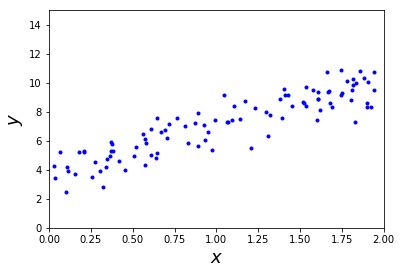

In [6]:
plt.plot(X,y,'b.')
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", fontsize=18)
_ =plt.axis([0,2,0,15])

In [7]:
X_b = np.c_[np.ones((100,1)),X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
print(theta_best)

[[3.84157227]
 [3.17118455]]


In [8]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)),X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 3.84157227],
       [10.18394137]])

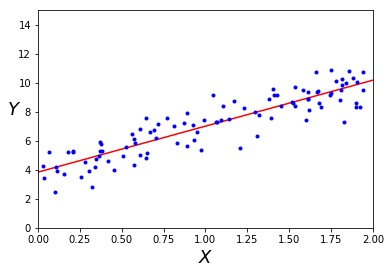

In [9]:
plt.plot(X_new,y_predict,'r-')
plt.plot(X,y,'b.')
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$Y$", rotation=0, fontsize=18)
plt.axis([0,2,0,15]);

# Gradient Descent

<b>Cost</b>
\begin{equation}
J(\theta) = 1/2m \sum_{i=1}^{m} (h(\theta)^{(i)} - y^{(i)})^2 
\end{equation}

<b>Gradient</b>

\begin{equation}
\frac{\partial J(\theta)}{\partial \theta_j} = 1/m\sum_{i=1}^{m}(h(\theta^{(i)} - y^{(i)}).X_j^{(i)}
\end{equation}

<b>Gradients</b>
\begin{equation}
\theta_0: = \theta_0 -\alpha . (1/m .\sum_{i=1}^{m}(h(\theta^{(i)} - y^{(i)}).X_0^{(i)})
\end{equation}
\begin{equation}
\theta_1: = \theta_1 -\alpha . (1/m .\sum_{i=1}^{m}(h(\theta^{(i)} - y^{(i)}).X_1^{(i)})
\end{equation}
\begin{equation}
\theta_2: = \theta_2 -\alpha . (1/m .\sum_{i=1}^{m}(h(\theta^{(i)} - y^{(i)}).X_2^{(i)})
\end{equation}

\begin{equation}
\theta_j: = \theta_j -\alpha . (1/m .\sum_{i=1}^{m}(h(\theta^{(i)} - y^{(i)}).X_0^{(i)})
\end{equation}

In [10]:
def cost(theta, X, y):
    '''
    
    Calculates the cost for given X and Y. The following shows and example of a single dimensional X
    theta = Vector of thetas 
    X     = Row of X's np.zeros((2,j))
    y     = Actual y's np.zeros((2,1))
    
    where:
        j is the no of features
    '''
    
    m = len(y)
    predictions = X.dot(theta)
    cost = (1/2*m) * np.sum(np.square(predictions-y))
    return cost

In [11]:
def gradient_descent(X,y,theta,learning_rate=0.01,iterations=100):
    '''
    X    = Matrix of X with added bias units
    y    = Vector of Y
    theta=Vector of thetas np.random.randn(j,1)
    learning_rate 
    iterations = no of iterations
    
    Returns the final theta vector and array of cost history over no of iterations
    '''
    m = len(y)
    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations,2))
    for it in range(iterations):
        
        prediction = np.dot(X,theta)
        
        theta = theta -(1/m)*learning_rate*( X.T.dot((prediction - y)))
        theta_history[it,:] =theta.T
        cost_history[it]  = cost(theta, X, y)
        
    return theta, cost_history, theta_history

In [12]:
lr =0.001
n_iter = 1000
theta = np.random.randn(2,1)
X_b = np.c_[np.ones((len(X),1)),X]
theta,cost_history,theta_history = gradient_descent(X_b, y,theta, lr, n_iter)

print('Theta0:          {:0.3f},\nTheta1:          {:0.3f}'.format(theta[0][0],theta[1][0]))
print('Final cost:  {:0.3f}'.format(cost_history[-1]))

Theta0:          3.037,
Theta1:          3.320
Final cost:  6263.300


<h> Let's plot the cost history over iterations

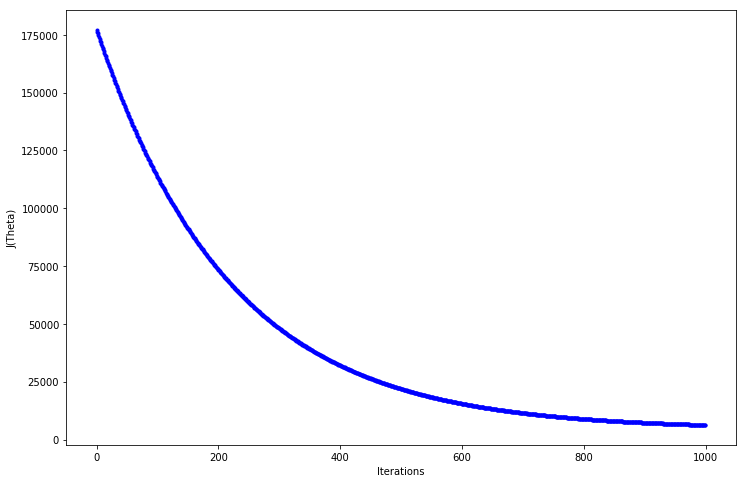

In [13]:
fig,ax = plt.subplots(figsize=(12,8))

ax.set_ylabel('J(Theta)')
ax.set_xlabel('Iterations')
_=ax.plot(range(n_iter),cost_history,'b.')

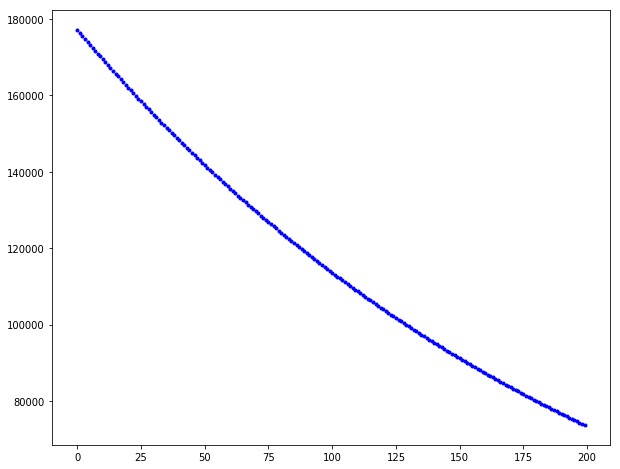

In [14]:
fig,ax = plt.subplots(figsize=(10,8))
_=ax.plot(range(200),cost_history[:200],'b.')

<h> After around 150 iterations the cost is flat so the remaining iterations  are not needed or will not result in any further optimization. Let us zoom in till iteration 200 and see the curve

### Considering another use case

In [15]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [16]:
data = pd.read_csv('data/loans.csv')
data.head()

,id_number,loan_amount,lender_count,status,funded_date,funded_amount,repayment_term,location_country_code,sector,description,use
0,736066,4825,60,funded,2014-08-03T17:51:50Z,4825,8,BJ,Retail,NaN,NaN
1,743090,975,34,funded,2014-08-18T09:10:54Z,975,12,BJ,Food,NaN,NaN
2,743120,950,25,funded,2014-08-09T17:46:35Z,950,14,BJ,Services,NaN,NaN
3,743121,825,28,funded,2014-08-24T17:00:38Z,825,14,BJ,Retail,NaN,NaN
4,743124,725,21,funded,2014-08-25T03:24:54Z,725,13,BJ,Retail,NaN,NaN


In [17]:
data.shape

(6019, 11)

In [18]:
X = data[['lender_count']]
y = data[['loan_amount']]
x_train, x_test, y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
print('Train features: ', x_train.shape)
print('Train labels: ', y_train.shape)
print('Test features: ', x_test.shape)
print('Test labels: ', y_test.shape)

Train features:  (4815, 1)
Train labels:  (4815, 1)
Test features:  (1204, 1)
Test labels:  (1204, 1)


In [20]:
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [21]:
predictions = regressor.predict(x_test)

In [22]:
print('Co-efficient of linear regression: ', regressor.coef_)

Co-efficient of linear regression:  [[31.21797906]]


In [23]:
print('Intercept of linear regression model: ',regressor.intercept_)

Intercept of linear regression model:  [385.41268642]


In [24]:
print('Mean Square Error: ', mean_squared_error(y_test, predictions))

Mean Square Error:  1118192.920007444


In [25]:
print('Model R^2 Square value: ', r2_score(y_test, predictions))

Model R^2 Square value:  0.8439817308734422


Text(0.5, 1.0, 'Linear Regression')

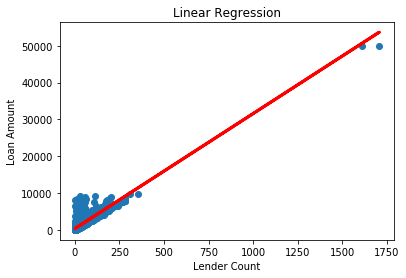

In [26]:
plt.scatter(x_test, y_test)
plt.plot(x_test, predictions, color='red', linewidth=3)
plt.xlabel('Lender Count')
plt.ylabel('Loan Amount')
plt.title('Linear Regression')